In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}


=== K-Nearest Neighbors ===
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.73      0.84        11
           2       0.85      1.00      0.92        17

    accuracy                           0.93        45
   macro avg       0.95      0.91      0.92        45
weighted avg       0.94      0.93      0.93        45



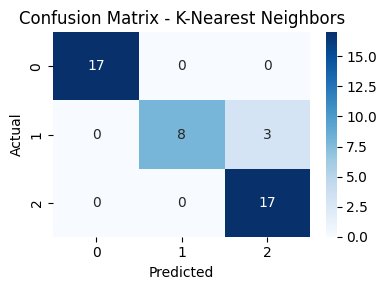


=== Gaussian Naive Bayes ===
Accuracy: 0.9556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



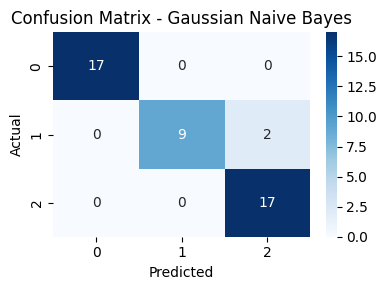


=== Support Vector Machine ===
Accuracy: 0.9556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



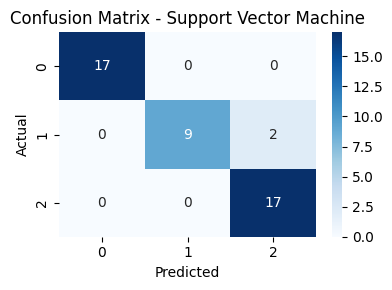


=== Decision Tree ===
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.90      0.82      0.86        11
           2       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



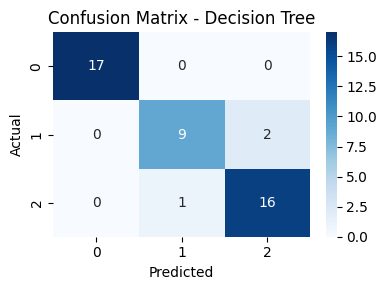

In [6]:
target_names = [str(name) for name in y.unique()]
for name, current_model in model.items():
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=target_names))

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()